In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
data=pd.read_csv('C:/Users/Windows 9/OneDrive/Documents/project/Data Analyst & Data Science-20250620T133147Z-1-001/stocks.csv',encoding='latin-1')

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             248 non-null    float64
 1   High             248 non-null    float64
 2   Low              248 non-null    float64
 3   Close            248 non-null    float64
 4   Adj Close        248 non-null    float64
 5   Volume           248 non-null    int64  
 6   Ticker_GOOG      248 non-null    bool   
 7   Ticker_MSFT      248 non-null    bool   
 8   Ticker_NFLX      248 non-null    bool   
 9   Date_2023-02-08  248 non-null    bool   
 10  Date_2023-02-09  248 non-null    bool   
 11  Date_2023-02-10  248 non-null    bool   
 12  Date_2023-02-13  248 non-null    bool   
 13  Date_2023-02-14  248 non-null    bool   
 14  Date_2023-02-15  248 non-null    bool   
 15  Date_2023-02-16  248 non-null    bool   
 16  Date_2023-02-17  248 non-null    bool   
 17  Date_2023-02-21 

In [40]:
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)
X = data.drop('Volume', axis=1)
y = data['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

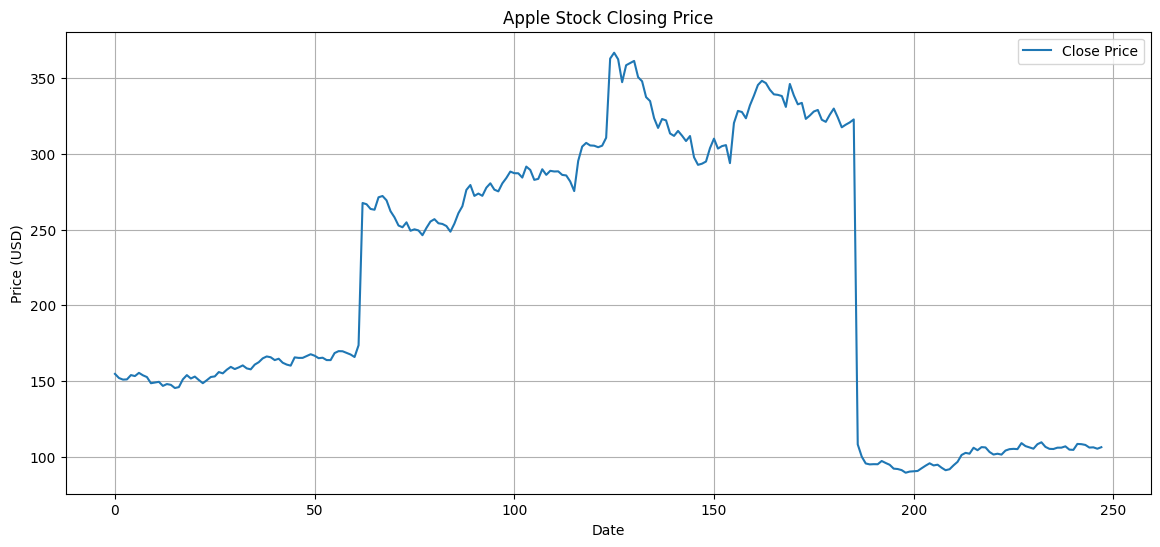

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.title("Apple Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


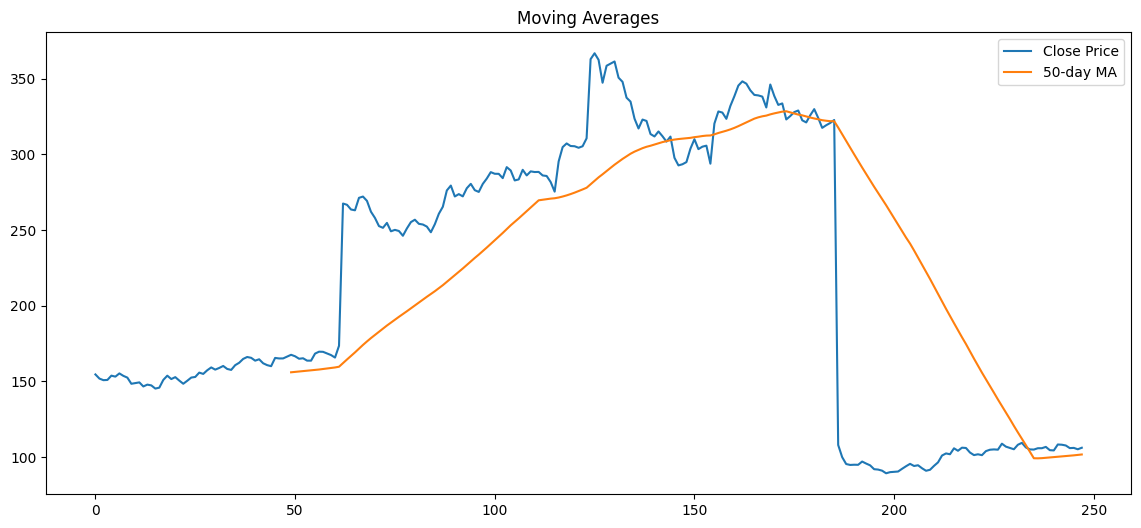

In [71]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(14, 6))
plt.plot(data['Close'] ,label='Close Price')
plt.plot(data['MA50'],label='50-day MA')
# plt.plot(data['MA200'],label='200-day MA')
plt.title("Moving Averages")
plt.legend()
plt.show()


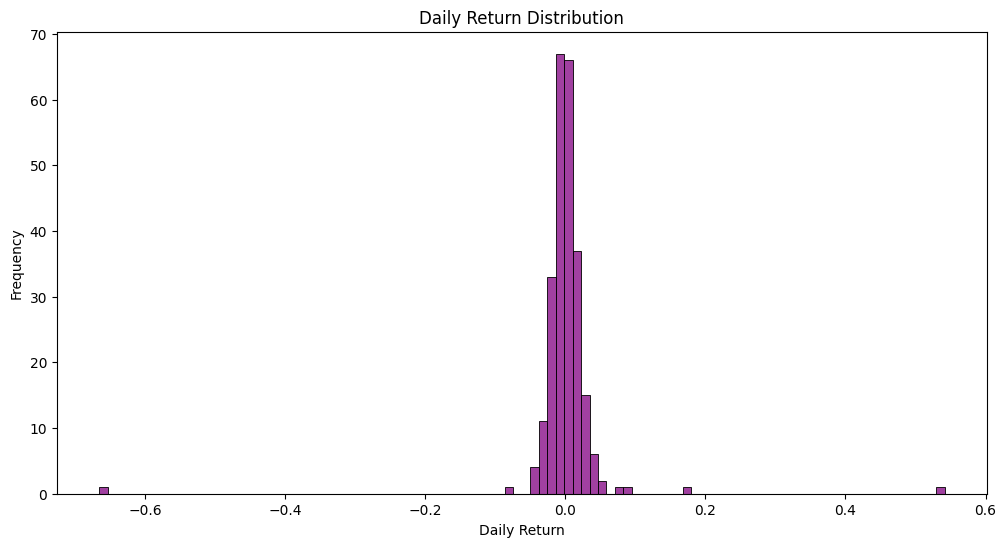

In [43]:
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(12, 6))
sns.histplot(data['Daily Return'].dropna(), bins=100, color='purple')
plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


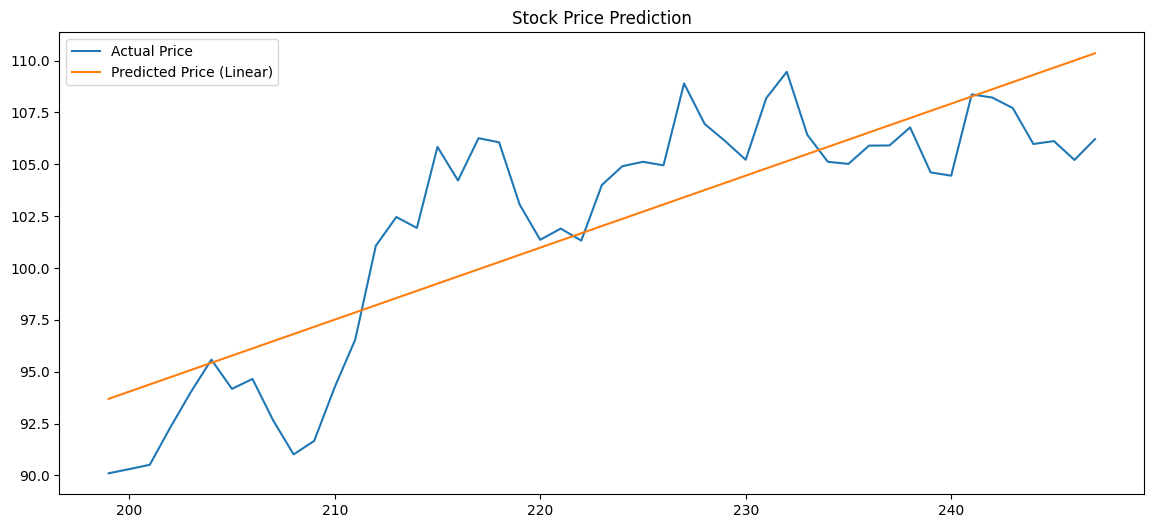

In [72]:
from sklearn.linear_model import LinearRegression
data = data.dropna()
data['Date'] = (data.index - data.index[1])
X = data[['Date']]
y = data['Close']
model = LinearRegression()
model.fit(X, y)
data['Predicted'] = model.predict(X)
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Actual Price')
plt.plot(data['Predicted'], label='Predicted Price (Linear)')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

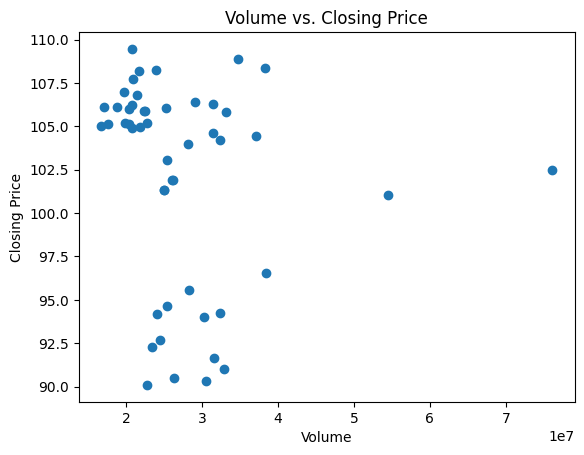

In [73]:
plt.scatter(data['Volume'], data['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

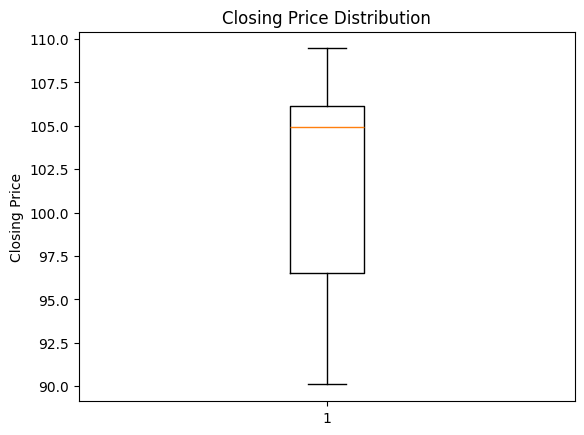

In [74]:
plt.boxplot(data['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()